<a href="https://colab.research.google.com/github/hyulianton/jejaringsosial/blob/master/js_menganalisis_ketahanan_(robustness)_jaringan_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Cell 1: Import Library**
*Keterangan*:  
- `matplotlib.pyplot` digunakan untuk membuat grafik.
- `networkx` digunakan untuk memodelkan dan menganalisis jaringan/graf.
- `heapq` berguna untuk pengurutan nilai sentralitas.
- `random` dipakai untuk pengambilan node acak.

In [ ]:
# Import library yang diperlukan untuk analisis jaringan dan visualisasi
import matplotlib.pyplot as plt
import networkx as nx
import heapq
import random
import collections

### **Cell 2: Import Fungsi dari File Analisis**
*Keterangan*:  
- Fungsi-fungsi ini membantu menghitung sentralitas, komputasi tambahan, dan membuat grafik distribusi.

In [ ]:
# Import fungsi tambahan untuk analisis dan plotting
def do_computations(g):
    print('Bitcoin Alpha Graph:', file=file)
    print('\tNumber of nodes:', g.number_of_nodes(), file=file)
    print('\tNumber of edges:', g.number_of_edges(), file=file)
    print('\tNumber of self-loops:', nx.number_of_selfloops(g), file=file)

    max_centrality = compute_centrality(g)  # Need to set how to calculate centrality inside the function
    print_node_degrees(g, max_centrality)
    print_node_degrees(g, ['2', '3', '4', '7'])  # These are other important nodes

    print('\n\tNumber of triangles:', sum(nx.triangles(g.to_undirected()).values()) / 3, file=file)
    print('\tAverage clustering:', nx.average_clustering(g.to_undirected()), file=file)

    print('\n\tStrongly connected components:', file=file)
    connected_comps_strong = [g.subgraph(c).copy() for c in nx.connected_components(g)]
    strong_giant = compute_component(connected_comps_strong)
    print('\tAverage shortest path length', nx.average_shortest_path_length(strong_giant), file=file)

    #print('\n\tWeakly connected components:', file=file)
    #connected_comps_weak = list(nx.weakly_connected_component_subgraphs(g))
    #weak_giant = compute_component(connected_comps_weak)

# Centrality can be calculated by Degrees, Closeness or Betweenness.
def compute_centrality(g):
    nodes_degrees = nx.degree_centrality(g)
    # nodes_degrees = nx.closeness_centrality(g)
    # nodes_degrees = nx.betweenness_centrality(g)

    max_centrality = max(nodes_degrees, key=nodes_degrees.get)
    print('\n\tNode with Max number of Edges: ', max_centrality,
          ' || Degree: ', nodes_degrees[max_centrality], file=file)

    return max_centrality

def plot_distribution(values, label):
    values_count = collections.Counter(values)
    val, cnt = zip(*values_count.items())

    fig, ax = plt.subplots()
    plt.bar(val, cnt, width=0.80, color='b')

    plt.title(label + " Histogram")
    plt.ylabel("Count")
    plt.xlabel(label)
    ax.set_xticks([v + 0.4 for v in val])
    ax.set_xticklabels(val)
    ax.set_xscale('log')
    ax.set_yscale('log')

    plt.show()

def print_node_degrees(g, node):
    print('\tDegrees data for node ', node, file=file)
    # print('\t\tMost important node In-Degree:', g.in_degree(node),
    #      ' || Weighted: ', g.in_degree(node, weight='weight'), file=file)
    # print('\t\tMost important node Out-Degree:', g.out_degree(node),
    #      ' || Weighted: ', g.out_degree(node, weight='weight'), file=file)
    print('\t\tMost important node Total-Degree:', g.degree(node),
          ' || Weighted: ', g.degree(node, weight='weight'), file=file)

def compute_component(comps):
    print('\t\tNumber of components:', len(comps), file=file)

    diameters = [nx.diameter(comp.to_undirected()) for comp in comps]
    print('\t\tDiameter max:', max(diameters), file=file)
    print('\t\tDiameter min:', min(diameters), file=file)
    print('\t\tDiameter avg:', sum(diameters) / len(diameters), file=file)
    if plotOn:
        plot_distribution(diameters, 'diameter')

    giant_comp = max(comps, key=len)  # This is a subgraph that we have to study
    compute_centrality(giant_comp)
    print('\tGiant component:', file=file)
    print('\t\tNumber of nodes:', giant_comp.number_of_nodes(), file=file)
    print('\t\tNumber of edges:', giant_comp.number_of_edges(), file=file)

    # indegree = dict(giant_comp.in_degree())
    # outdegree = dict(giant_comp.out_degree())
    degree = dict(giant_comp.degree())
    if plotOn:
        # plot_distribution(indegree.values(), 'indegree component')
        # plot_distribution(outdegree.values(), 'outdegree component')
        plot_distribution(degree.values(), 'degree')

    # print('\t\tMost important node is: \n\t\t\tIn-Degree ', max(indegree), ' || Out-Degree: ', max(outdegree),
    #      ' || Total Degree: ', max(degree), file=file)
    print('\t\tMost important node is: Total Degree: ', max(degree), file=file)

    print("\t\tDensity:", nx.density(giant_comp), file=file)
    print('\t\tAverage clustering', nx.average_clustering(nx.Graph(giant_comp)), file=file)

    return giant_comp

### **Cell 3: Inisialisasi Variabel Utama**
*Keterangan*:  
- Membuat objek graf kosong.
- Variabel boolean untuk mengatur apakah ingin menggambar graf, plotting hasil, dan menghitung diameter komponen.

In [ ]:
# Inisialisasi graf kosong dan beberapa variabel kontrol untuk plotting
g = nx.Graph().to_undirected()
node_pose = {}
drawGraphOn = True
plotOn = True
diametersOn = True
plotDiametersOn = False

### **Cell 4: Membaca Data Graf Bitcoin**
*Keterangan*:  
- Membaca hubungan antar node dari file CSV dan menambahkannya ke graf sebagai edge (sisi) dengan bobot tertentu.

In [ ]:
# Download file bitcoin.csv dari repo GitHub riki95
# URL di bawah adalah direct link ke file mentah (raw) bitcoin.csv untuk dapat langsung diunduh
!wget https://raw.githubusercontent.com/riki95/Network-Robustness-with-NetworkX/master/bitcoin.csv -O bitcoin.csv

# Verifikasi file sudah selesai diunduh
import os
assert os.path.exists("bitcoin.csv"), "File bitcoin.csv gagal didownload!"
print("Download berhasil: bitcoin.csv siap digunakan.")

--2025-11-22 03:44:05--  https://raw.githubusercontent.com/riki95/Network-Robustness-with-NetworkX/master/bitcoin.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503131 (491K) [text/plain]
Saving to: ‘bitcoin.csv’

bitcoin.csv         100%[===================>] 491.34K  --.-KB/s    in 0.04s   

2025-11-22 03:44:05 (13.2 MB/s) - ‘bitcoin.csv’ saved [503131/503131]

Download berhasil: bitcoin.csv siap digunakan.


In [ ]:
def create_graph():
    # Membaca data dari bitcoin.csv dan memasukkan edge ke graf
    with open('bitcoin.csv') as f:
        for row in f:
            s = row.split(',')
            g.add_edge(s[0], s[1], weight=int(s[2]))

### **Cell 5: Fungsi Menghapus Node Secara Acak**
*Keterangan*:  
- Setiap eksekusi menghapus satu node acak sebanyak `n` kali dari graf untuk menguji ketahanan.


In [ ]:
def remove_random_node(g, n):
    # Menghapus n node secara acak dari graf
    import random
    for i in range(n):
        node = random.choice(list(g.nodes()))
        g.remove_node(node)

### **Cell 6: Fungsi Visualisasi Graf**
*Keterangan*:  
- Mensimulasikan graf sebagai gambar, ukuran node dan font menyesuaikan banyak node.
- File gambar disimpan dalam folder data.

In [ ]:
def draw_graph(g, layout, title, namefile):
    # Visualisasi dan simpan gambar graf dengan layout tertentu
    plt.title(title)
    if g.number_of_nodes() < 100:
        nx.draw_networkx(g, node_size=150, font_size=9, arrowsize=3, node_color='b', pos=layout)
    else:
        nx.draw_networkx(g, node_size=50, font_size=6, arrowsize=3, node_color='b', pos=layout)
    plt.savefig(namefile + '.png', dpi=500)
    plt.close()

### **Cell 7: Analisis Ketahanan Jaringan Bitcoin Secara Acak**
*Keterangan*:  
- Fungsi utama simulasi penghapusan node secara acak dan plotting hasil analisis jaringan.
- Statistik seperti jumlah komponen, diameter, dan ukuran 'giant component' direkam lalu digambarkan.

In [ ]:
def bitcoin_robustness_random():
    # --- Membuat graf dan posisi layout ---
    create_graph()
    g.to_undirected()
    pos = nx.spring_layout(g)

    g_remove_most_important = g.copy()
    list_components = []
    list_removed = []
    list_removed2 = [i for i in range(0, 2001, 200)]  # Angka node yang dihapus per tahap
    list_diameters = []
    list_diameters_number = []
    list_diameters_max = []
    list_diameters_min = []
    list_giantcomponentnodes = []

    # --- Visualisasi graf awal ---
    if drawGraphOn:
        draw_graph(g, pos, "Graph", 'g1')

    print("::: Computing Degree :::")
    for x in range(2001):  # Hapus node satu per satu secara acak
        best_node = random.choice(list(g_remove_most_important.nodes()))
        if x in list_removed2:  # Setiap kelipatan 200 node, rekam statistik
            print('----- Nodes removed: ', x, ' -----')
            comps = [g_remove_most_important.subgraph(c).copy() for c in nx.connected_components(g_remove_most_important)]
            giant_comp = max(comps, key=len)
            comp_nodes_number = giant_comp.number_of_nodes()
            comp_len = len(comps)

            if diametersOn:
                diameters = [nx.diameter(comp.to_undirected()) for comp in comps]
                list_diameters_max.append(max(diameters))
                list_diameters_min.append(min(diameters))
                list_diameters.append(sum(diameters) / len(diameters))
                list_diameters_number.append(x)

                if plotDiametersOn and x == 1000:  # Plot distribusi degree jika diaktifkan
                    degree = dict(giant_comp.degree())
                    plot_distribution(degree.values(), 'degree', 'degree')

            list_giantcomponentnodes.append(comp_nodes_number)
            list_components.append(comp_len)
            list_removed.append(x)

        g_remove_most_important.remove_nodes_from([best_node])

    # --- Visualisasi graf jaringan setelah dihapus ---
    if drawGraphOn:
        do_computations(g_remove_most_important)
        draw_graph(g_remove_most_important, pos, "Graph with removal by degree", 'g2_degree')
        plt.show()

    # --- Plot hasil analisis ---
    if plotOn:
        # Plot diameter setiap komponen
        plt.plot(list_removed, list_diameters_max, 'r-')
        plt.plot(list_removed, list_diameters_min, 'b-')
        plt.plot(list_removed, list_diameters, 'g-')
        plt.ylabel("Diameter")
        plt.xlabel("Removed nodes")
        plt.legend(['Max', 'Min', 'Average'], loc='lower right')
        plt.savefig('diagram_degree' + '.png', dpi=500)
        plt.show()

        # Plot jumlah komponen & nodes pada giant component
        plt.plot(list_removed, list_components, 'r-')
        plt.plot(list_diameters_number, list_giantcomponentnodes, 'c-')
        plt.ylabel("Components number and Giant Component number of nodes")
        plt.xlabel("Removed nodes")
        plt.legend(['Components', 'GiantComponent'], loc='upper right')
        plt.savefig('centralities_and_giant' + '.png', dpi=500)
        plt.show()

### **Cell 8: Menjalankan Fungsi Utama Analisis**
*Keterangan*:  
- Memanggil fungsi analisis sehingga semua proses berjalan.

::: Computing Degree :::
----- Nodes removed:  0  -----
----- Nodes removed:  200  -----
----- Nodes removed:  400  -----
----- Nodes removed:  600  -----
----- Nodes removed:  800  -----
----- Nodes removed:  1000  -----
----- Nodes removed:  1200  -----
----- Nodes removed:  1400  -----
----- Nodes removed:  1600  -----
----- Nodes removed:  1800  -----
----- Nodes removed:  2000  -----
Bitcoin Alpha Graph:
	Number of nodes: 1782
	Number of edges: 3335
	Number of self-loops: 0

	Node with Max number of Edges:  1  || Degree:  0.13363279056709715
	Degrees data for node  1
		Most important node Total-Degree: 238  || Weighted:  300
	Degrees data for node  ['2', '3', '4', '7']
		Most important node Total-Degree: [('4', 106)]  || Weighted:  [('4', 244)]

	Number of triangles: 2694.0
	Average clustering: 0.09935974530041013

	Strongly connected components:
		Number of components: 436
		Diameter max: 9
		Diameter min: 0
		Diameter avg: 0.05963302752293578


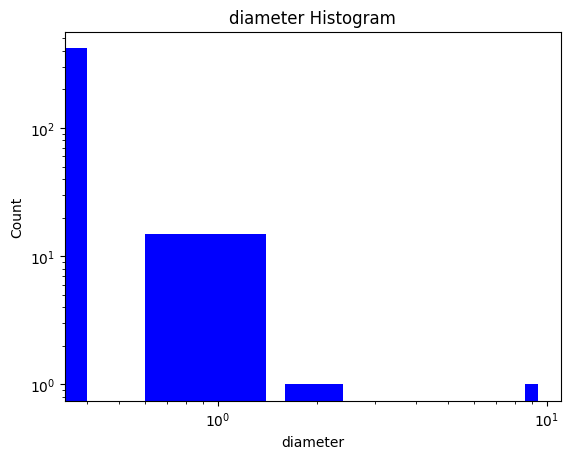


	Node with Max number of Edges:  1  || Degree:  0.17908201655379985
	Giant component:
		Number of nodes: 1330
		Number of edges: 3318


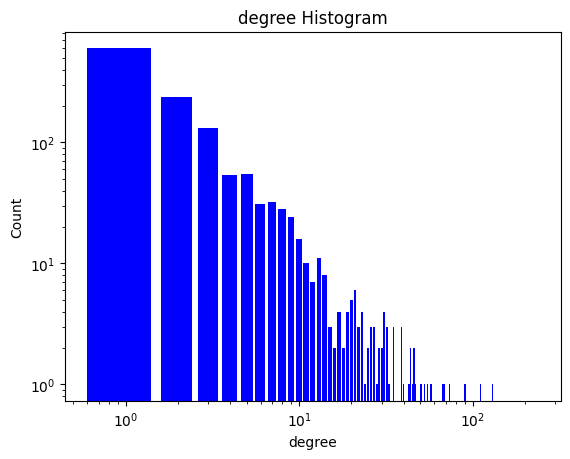

		Most important node is: Total Degree:  999
		Density: 0.0037543067601283116
		Average clustering 0.1331271173874668
	Average shortest path length 3.6726398388748396


/usr/local/lib/python3.12/dist-packages/networkx/drawing/nx_pylab.py:1296: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


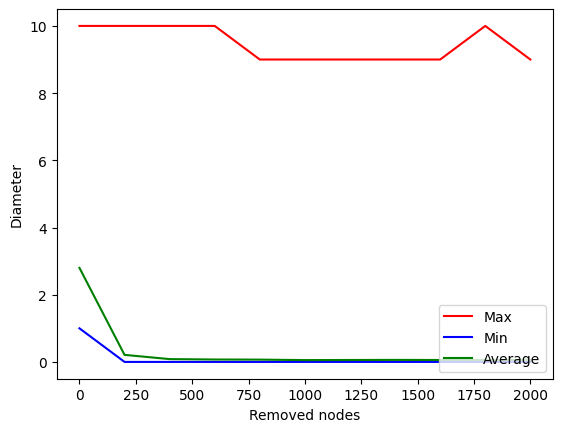

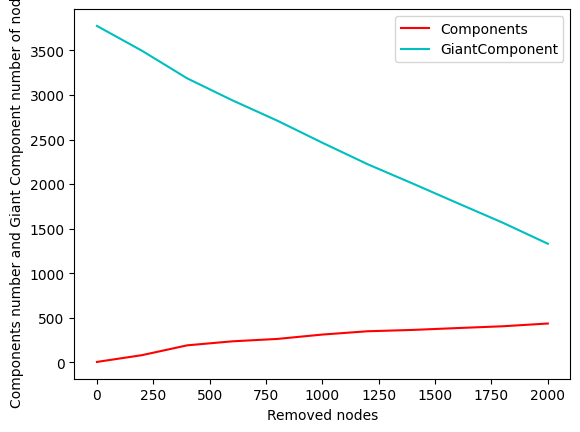

In [ ]:
file = None
bitcoin_robustness_random()

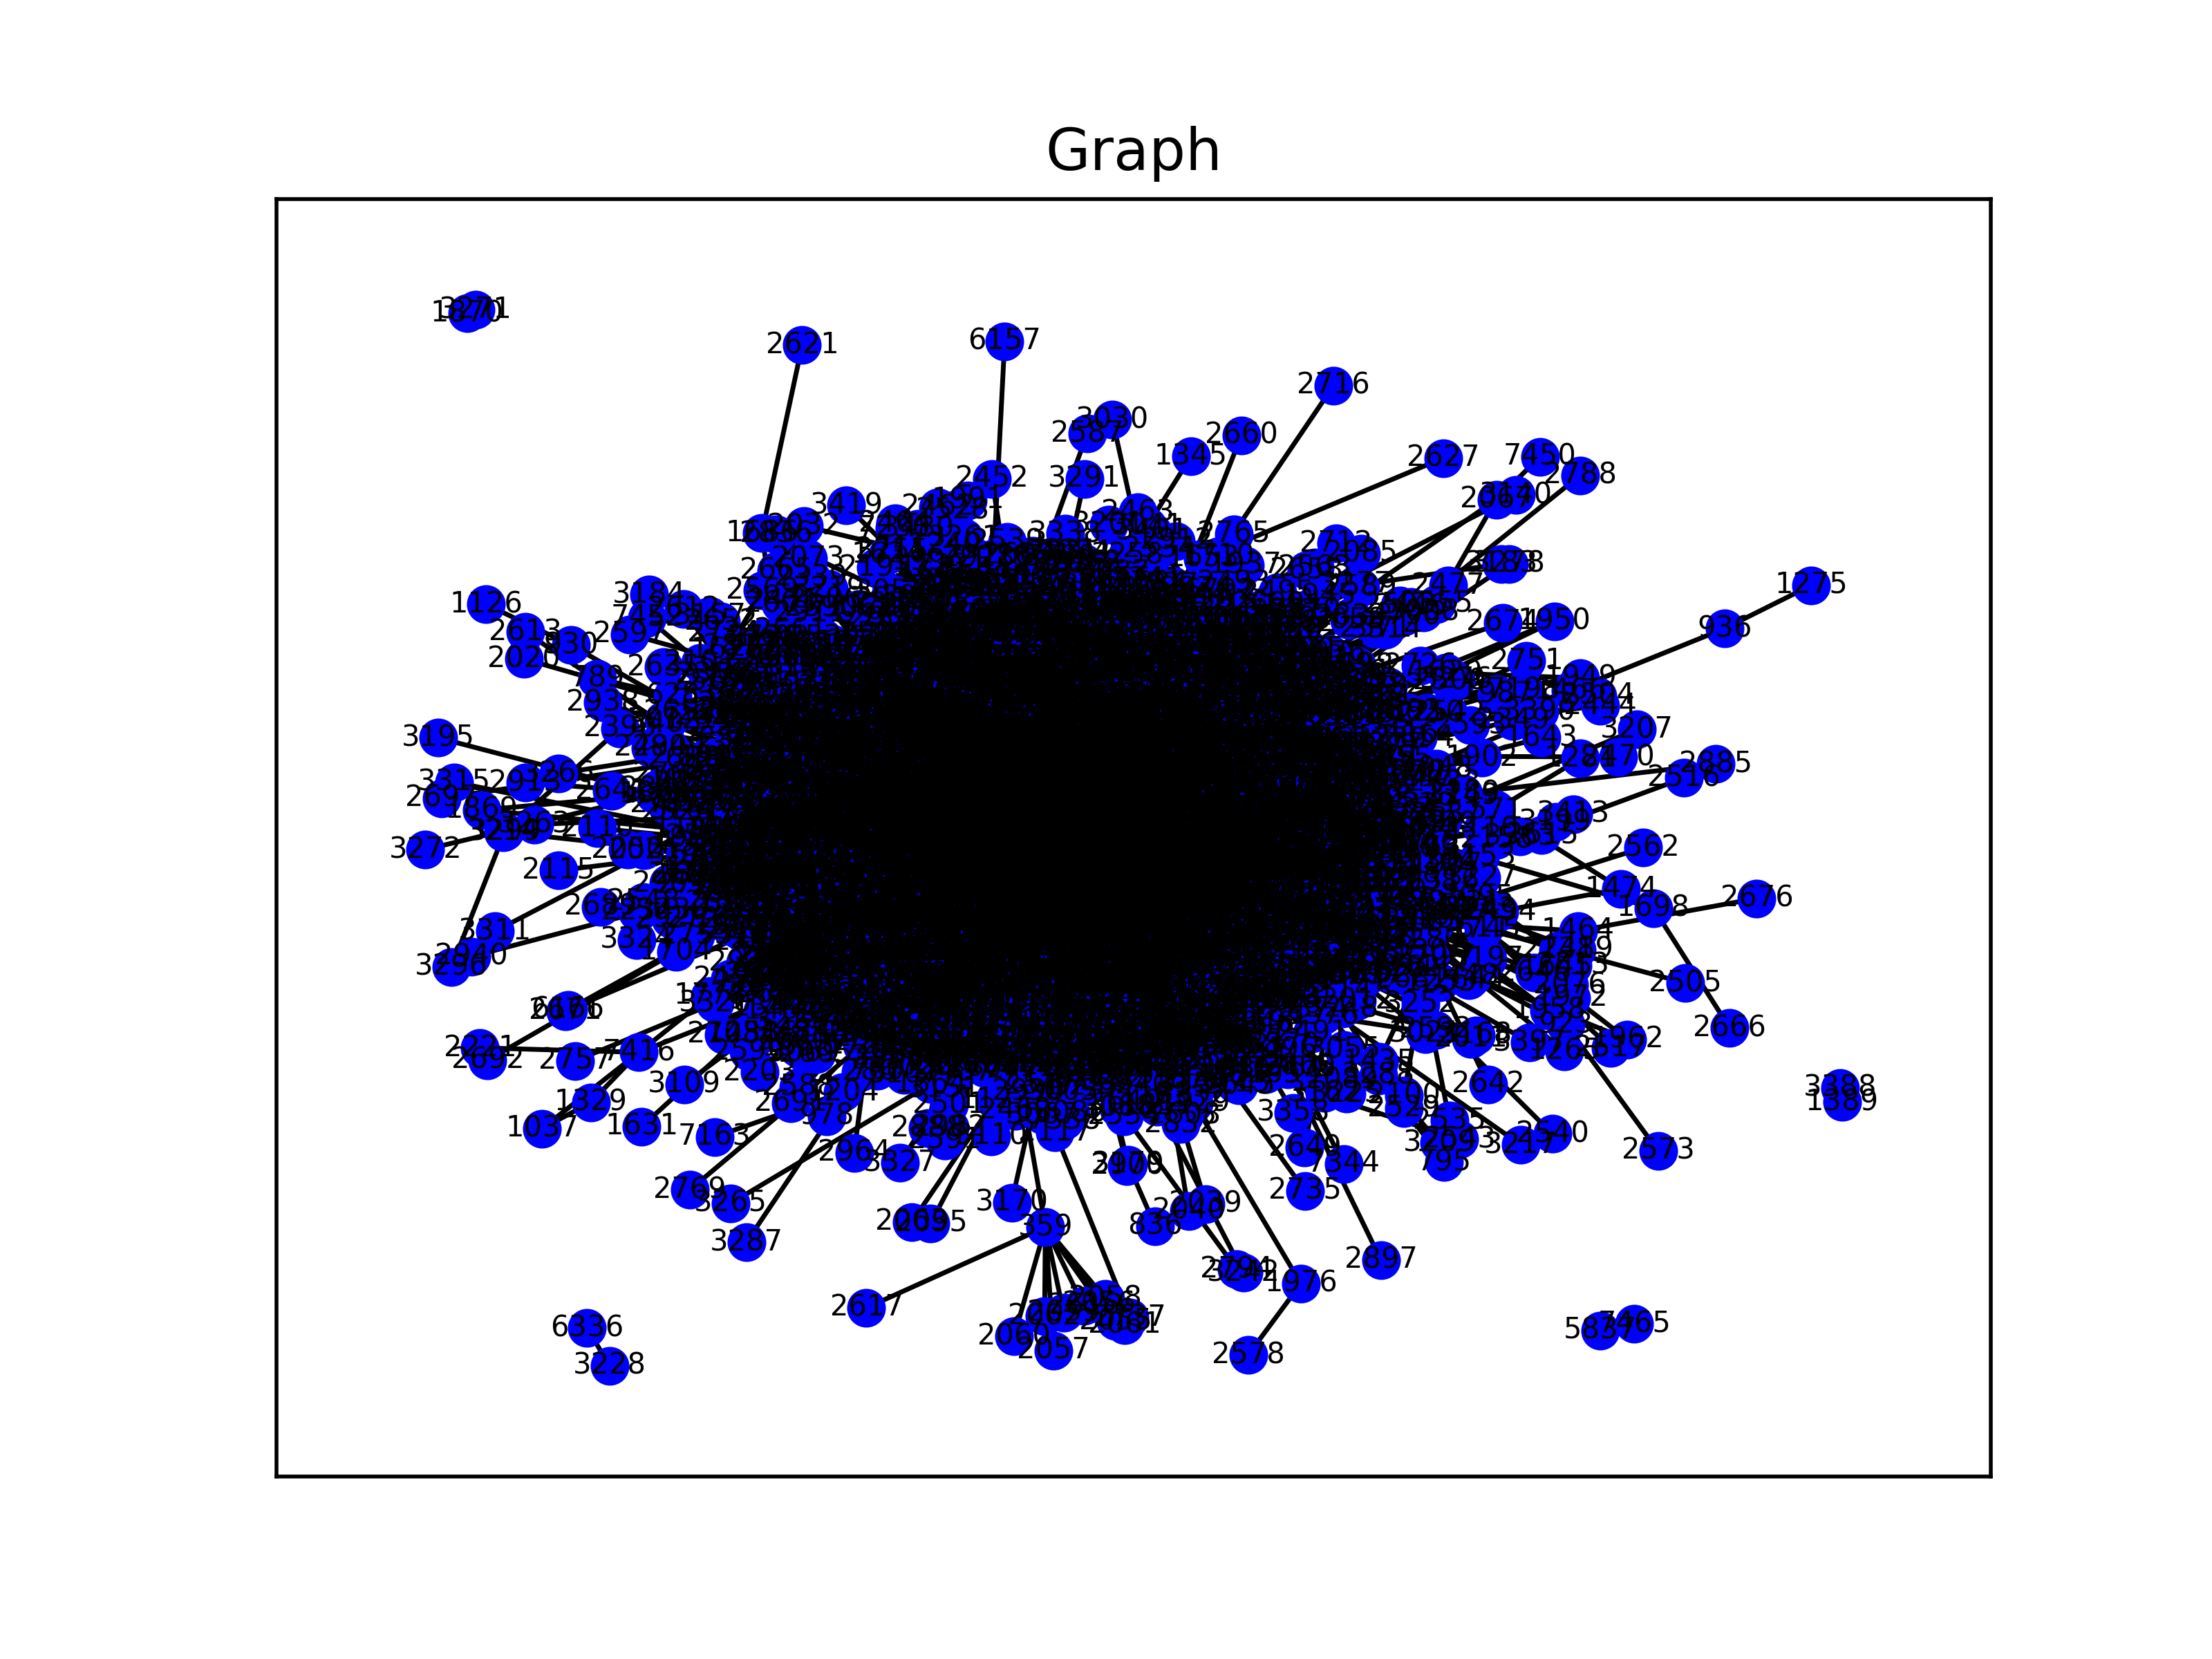

In [ ]:
from IPython.display import Image, display

# Ganti 'nama_file.png' dengan nama file PNG kamu
display(Image(filename='g1.png'))


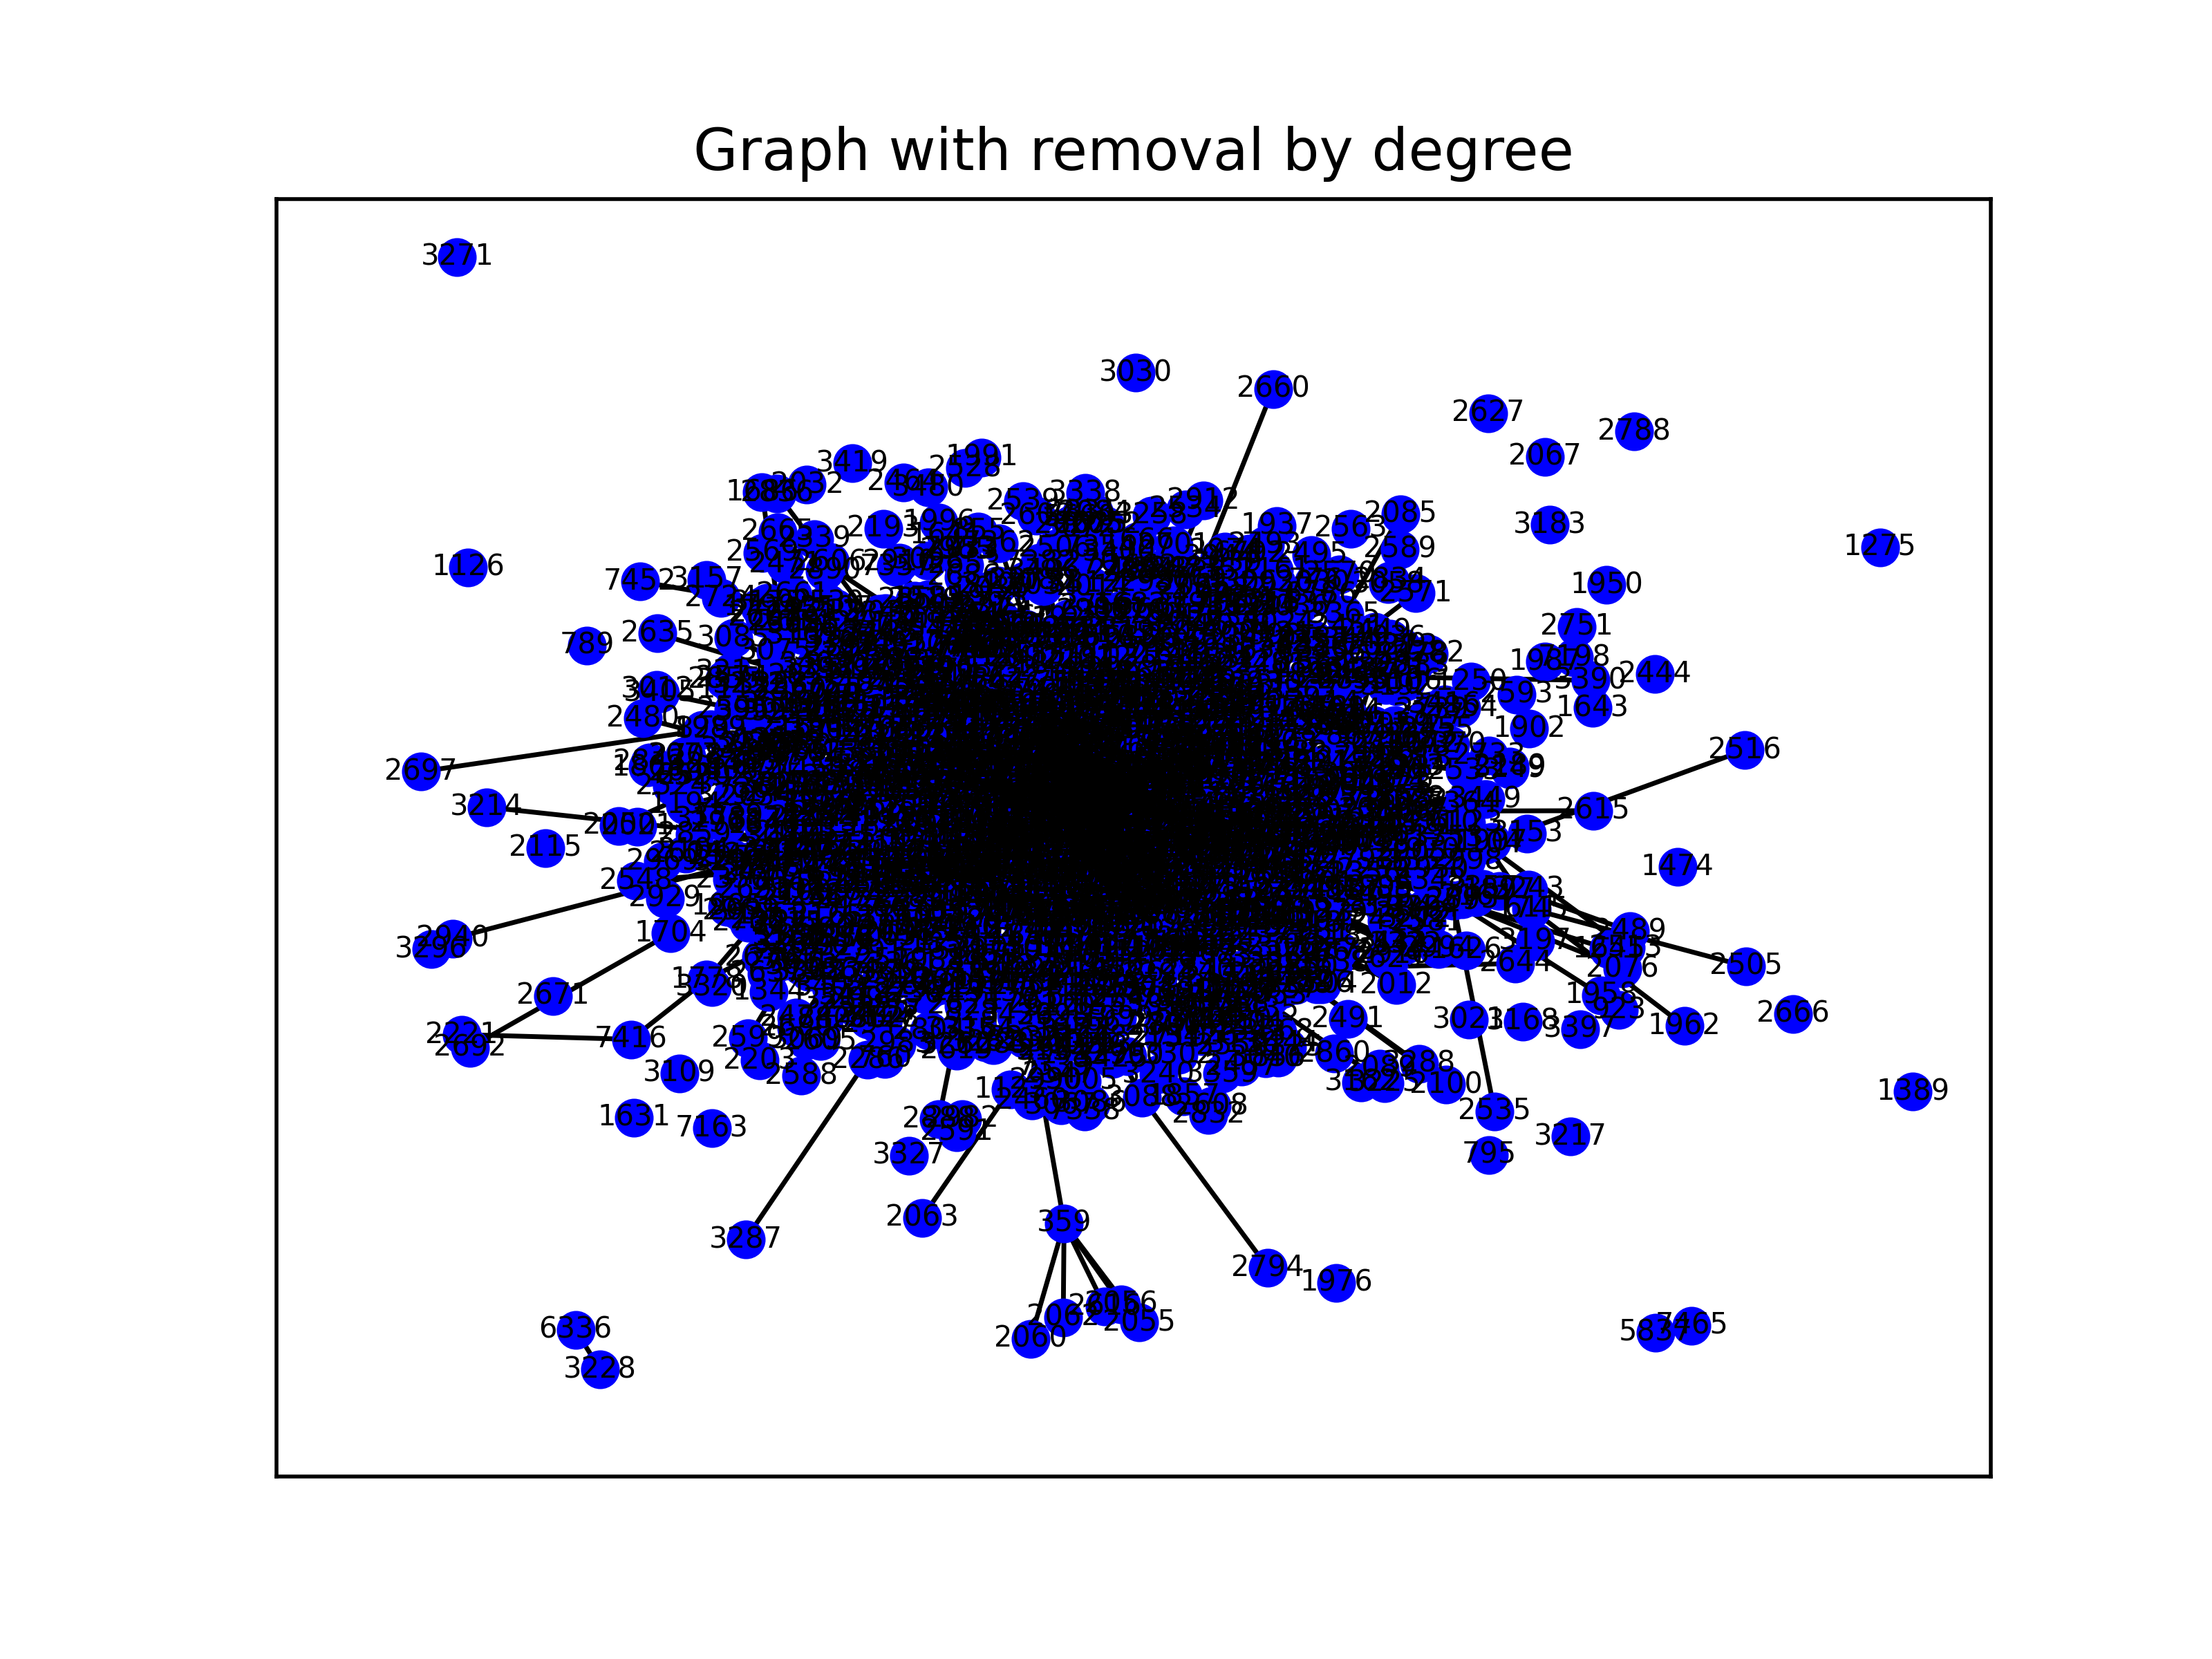

In [ ]:
display(Image(filename='g2_degree.png'))